# The Power of Plots

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. This analysis will generate all the tables and figures needed for the technical report of the study. A top-level summary of the study results follows.

## Observations:

1- Capomulin is the most used treatment (230 times)

2- Capomulin and Ramicane have the densest results due to their low variance and standard deviation.

3- Approximately half population of tested mice are male and the other half are female (51% men and 49% women)

4- Although the Infubinol regimen shows promising results, it contains one outlier result.

5- There is a positive correlation between mouse weight and average tumor volume for Capomulin treatment

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_data_df = pd.merge(mouse_metadata, study_results, how = 'outer', on='Mouse ID')

In [5]:
# Display the data table for preview
mouse_study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.

mice_number = mouse_study_data_df.groupby("Mouse ID")
number_of_mice = len(mice_number.count())
number_of_mice


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_data_df.loc[mouse_study_data_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_dups = mouse_study_data_df
mouse_study_dups.loc[mouse_study_data_df["Mouse ID"]== "g989"]
mouse_study_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study_data_df
rmv = clean_mouse[clean_mouse['Mouse ID']=="g989"].index.values
clean_mouse_data = clean_mouse.drop(rmv)
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_data = clean_mouse_data
clean_mice_number = clean_mouse_data.groupby("Mouse ID")
clean_number_of_mice = len(clean_mice_number.count())
clean_number_of_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume_regimen = clean_mouse_data[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen")
tumor_volume_count = tumor_volume_regimen["Tumor Volume (mm3)"].count()
tumor_volume_mean = tumor_volume_regimen["Tumor Volume (mm3)"].mean()
tumor_volume_mean = round(tumor_volume_mean,2)
tumor_volume_median = tumor_volume_regimen["Tumor Volume (mm3)"].median()
tumor_volume_median = round(tumor_volume_median,2)
tumor_volume_var = tumor_volume_regimen["Tumor Volume (mm3)"].var()
tumor_volume_var = round(tumor_volume_var,2)
tumor_volume_std = tumor_volume_regimen["Tumor Volume (mm3)"].std()
tumor_volume_std = round(tumor_volume_std,2)
tumor_volume_sem = tumor_volume_regimen["Tumor Volume (mm3)"].sem()
tumor_volume_sem = round(tumor_volume_sem,2)

summary_statistics = pd.DataFrame({"Count":tumor_volume_count,
                               "Mean":tumor_volume_mean,
                               "Median":tumor_volume_median,
                               "Variance":tumor_volume_var,
                               "STD":tumor_volume_std,
                               "SEM":tumor_volume_sem})

print (summary_statistics)

              Count   Mean  Median  Variance   STD   SEM
Drug Regimen                                            
Capomulin       230  40.68   41.56     24.95  4.99  0.33
Ceftamin        178  52.59   51.78     39.29  6.27  0.47
Infubinol       178  52.88   51.82     43.13  6.57  0.49
Ketapril        188  55.24   53.70     68.55  8.28  0.60
Naftisol        186  54.33   52.51     66.17  8.13  0.60
Placebo         181  54.03   52.29     61.17  7.82  0.58
Propriva        148  52.32   50.45     43.85  6.62  0.54
Ramicane        228  40.22   40.67     23.49  4.85  0.32
Stelasyn        181  54.23   52.43     59.45  7.71  0.57
Zoniferol       182  53.24   51.82     48.53  6.97  0.52


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_2 = clean_mouse_data.groupby("Drug Regimen").agg(["count","mean","median","var","std", "sem"])
summary_statistics_2["Tumor Volume (mm3)"]

,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements for Each Drug Regimen')

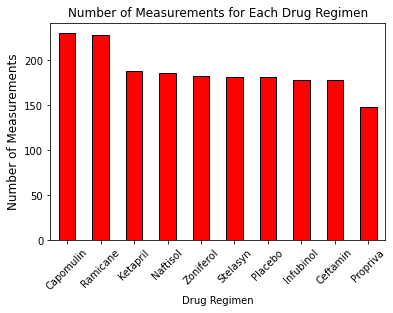

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

df_index = summary_statistics_2.reset_index().sort_values(by = "Drug Regimen", ascending = False)

drug_regimen = df_index.iloc[:,0]

figsize=(5,3)
ax = tumor_volume_count.sort_values(ascending = False).plot(kind = "bar", x="drug_regimen", 
                                                            rot = 45 ,facecolor = "r", edgecolor = "black", 
                                                            align="center")

ax.set_ylabel("Number of Measurements",size = 12)
ax.set_title("Number of Measurements for Each Drug Regimen",size = 12)


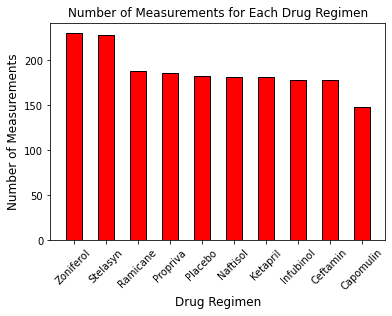

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#figsize=(5,3)
plt.bar(drug_regimen,tumor_volume_count.sort_values(ascending = False),facecolor = "r", edgecolor = "black", width = 0.5,
       align="center")
plt.xticks(rotation=45)

plt.xlabel("Drug Regimen",size = 12)
plt.ylabel("Number of Measurements",size = 12)
plt.title("Number of Measurements for Each Drug Regimen",size = 12)

plt.show()

Text(0.5, 1.0, 'Distribution of Female vs Male mice using Pandas')

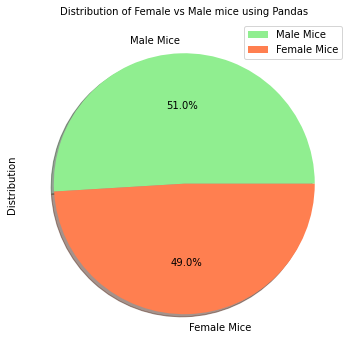

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


total = clean_mouse_study_data["Sex"].value_counts()
male = total [0]
female = total [1]

male_distribution = male/(male+female)
female_distribution = female/(male+female)

total_distribution = pd.DataFrame({"Distribution":[male_distribution, female_distribution]},
                                  index=['Male Mice', 'Female Mice'])
                                  
plot = total_distribution.plot.pie(y='Distribution', figsize=(6, 6), 
                                   shadow= True, autopct='%1.1f%%', 
                                   colors = ['lightgreen', 'coral'] )

plt.title("Distribution of Female vs Male mice using Pandas",size = 10)


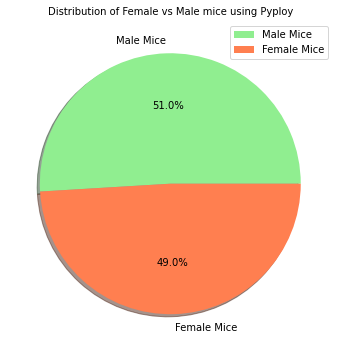

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie([male_distribution, female_distribution], 
        labels = ['Male Mice', 'Female Mice'],
        shadow = True, autopct='%1.1f%%',
        colors = ['lightgreen', 'coral'])

plt.legend(loc= "upper right")
plt.title("Distribution of Female vs Male mice using Pyploy",size = 10)
fig = plt.gcf()
fig.set_size_inches(6,6) 
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Haf_dat = clean_mouse_study_data[clean_mouse_study_data["Drug Regimen"] == "Capomulin"]
Haf_dat = Haf_dat.append(clean_mouse_study_data[clean_mouse_study_data["Drug Regimen"] == "Ramicane"])
Haf_dat = Haf_dat.append(clean_mouse_study_data[clean_mouse_study_data["Drug Regimen"] == "Infubinol"])
Haf_dat = Haf_dat.append(clean_mouse_study_data[clean_mouse_study_data["Drug Regimen"] == "Ceftamin"])
Haf_dat

vol = Haf_dat.groupby(["Mouse ID","Timepoint"])
vol2 = vol["Tumor Volume (mm3)"].max()
vol3 = vol2.reset_index()
vol4 = vol3[vol3["Timepoint"] == 45]
vol4
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Data_test = clean_mouse_study_data
Test_mouse = pd.merge(Data_test, vol4, on = ("Mouse ID","Timepoint"), how = "left", suffixes = ("","(end)"))
Test_mouse




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)(end)
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

Final_Tumor_Volume =  Test_mouse[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]\
               .groupby(["Drug Regimen", "Mouse ID" ]).last()\
               .reset_index()
            
Final_Tumor_Volume_Capomulin = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"] == "Capomulin"),:]
Final_Tumor_Volume_Ramicane = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"] == "Ramicane"),:]
Final_Tumor_Volume_Ceftamin = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"] == "Ceftamin"),:]
Final_Tumor_Volume_Infubinol = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"] == "Infubinol"),:]

quantile_Capomulin = Final_Tumor_Volume_Capomulin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
quantile_Ramicane = Final_Tumor_Volume_Ramicane["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
quantile_Ceftamin = Final_Tumor_Volume_Ceftamin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
quantile_Infubinol = Final_Tumor_Volume_Infubinol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])

lowerq_Capomulin = quantile_Capomulin[0.25]
lowerq_Ramicane = quantile_Ramicane[0.25]
lowerq_Ceftamin = quantile_Ceftamin[0.25]
lowerq_Infubinol = quantile_Infubinol[0.25]


upperq_Capomulin = quantile_Capomulin[0.75]
upperq_Ramicane = quantile_Ramicane[0.75]
upperq_Ceftamin = quantile_Ceftamin[0.75]
upperq_Infubinol = quantile_Infubinol[0.75]


iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol


lowerband_Capomulin = lowerq_Capomulin-(1.5*iqr_Capomulin)
lowerband_Ramicane = lowerq_Ramicane-(1.5*iqr_Ramicane)
lowerband_Ceftamin = lowerq_Ceftamin-(1.5*iqr_Ceftamin)
lowerband_Infubinol = lowerq_Infubinol-(1.5*iqr_Infubinol)

upperband_Capomulin = upperq_Capomulin+(1.5*iqr_Capomulin)
upperband_Ramicane = upperq_Ramicane+(1.5*iqr_Ramicane)
upperband_Ceftamin = upperq_Ceftamin+(1.5*iqr_Ceftamin)
upperband_Infubinol = upperq_Infubinol+(1.5*iqr_Infubinol)

potential_outliers_Capomulin = Final_Tumor_Volume_Capomulin.loc[(Final_Tumor_Volume_Capomulin["Tumor Volume (mm3)"] < 
                               lowerband_Capomulin)|(Final_Tumor_Volume_Capomulin["Tumor Volume (mm3)"] > 
                               upperband_Capomulin),:]

potential_outliers_Ramicane = Final_Tumor_Volume_Ramicane.loc[(Final_Tumor_Volume_Ramicane["Tumor Volume (mm3)"] < 
                              lowerband_Ramicane)|(Final_Tumor_Volume_Ramicane["Tumor Volume (mm3)"] > 
                              upperband_Ramicane),:]

potential_outliers_Ceftamin = Final_Tumor_Volume_Ceftamin.loc[(Final_Tumor_Volume_Ceftamin["Tumor Volume (mm3)"] < 
                              lowerband_Ceftamin)|(Final_Tumor_Volume_Ceftamin["Tumor Volume (mm3)"] > 
                              upperband_Ceftamin),:]

potential_outliers_Infubinol = Final_Tumor_Volume_Infubinol.loc[(Final_Tumor_Volume_Infubinol["Tumor Volume (mm3)"] < 
                               lowerband_Infubinol)|(Final_Tumor_Volume_Infubinol["Tumor Volume (mm3)"] > 
                               upperband_Infubinol),:]

print('Capomulin dataset has '+str(len(potential_outliers_Capomulin))+" Outliers.")
if not(potential_outliers_Capomulin.empty):
    print("Capomulin ouliers are "+potential_outliers_Capomulin.to_string(index=False))
    
print('Ramicane dataset has '+str(len(potential_outliers_Ramicane))+" Outliers.")
if not(potential_outliers_Ramicane.empty):
    print("Ramicane ouliers are "+potential_outliers_Ramicane.to_string(index=False))
    
print('Ceftamin dataset has '+str(len(potential_outliers_Ceftamin))+" Outliers.")
if not(potential_outliers_Ceftamin.empty):
    print("Ceftamin oulier are "+potential_outliers_Ceftamin.to_string(index=False))
    
print('Infubinol dataset has '+str(len(potential_outliers_Infubinol))+" Outliers.")
if not(potential_outliers_Infubinol.empty):
    print("Infubinol ouliers are: "+potential_outliers_Infubinol.to_string(index=False))  
    

Capomulin dataset has 0 Outliers.
Ramicane dataset has 0 Outliers.
Ceftamin dataset has 0 Outliers.
Infubinol dataset has 1 Outliers.
Infubinol ouliers are: Drug Regimen Mouse ID  Tumor Volume (mm3)
   Infubinol     c326           36.321346


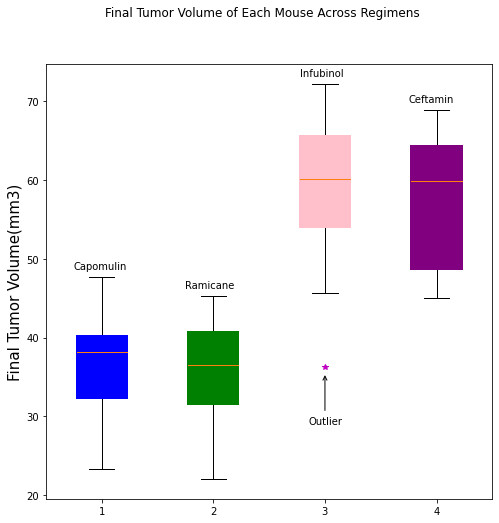

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Final_Tumor_Volume_Capomulin["Tumor Volume (mm3)"],Final_Tumor_Volume_Ramicane["Tumor Volume (mm3)"],\
        Final_Tumor_Volume_Infubinol["Tumor Volume (mm3)"],Final_Tumor_Volume_Ceftamin["Tumor Volume (mm3)"]]

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle("Final Tumor Volume of Each Mouse Across Regimens",fontsize = 12)

A = ax.boxplot(data, patch_artist=True, sym = 'm*')
colors = ["blue","green","pink","purple"]

for box,c in zip(A['boxes'],colors):
    box.set(color = c, linewidth=2)
    
ax.set_ylabel("Final Tumor Volume(mm3)",fontsize =15)

ax.text(0.75, max(Final_Tumor_Volume_Capomulin["Tumor Volume (mm3)"])+1, "Capomulin", transform=ax.transData)
ax.text(1.75, max(Final_Tumor_Volume_Ramicane["Tumor Volume (mm3)"])+1, "Ramicane", transform=ax.transData)
ax.text(3.75, max(Final_Tumor_Volume_Ceftamin["Tumor Volume (mm3)"])+1, "Ceftamin", transform=ax.transData)
ax.text(2.78, max(Final_Tumor_Volume_Infubinol["Tumor Volume (mm3)"])+1, "Infubinol", transform=ax.transData)
ax.text(2.85, 29, "Outlier", transform=ax.transData)
ax.annotate("", xy=(3, 35.5), xytext=(3, 30.5),
            arrowprops=dict(arrowstyle="->"))

plt.show()

## Line and Scatter Plots

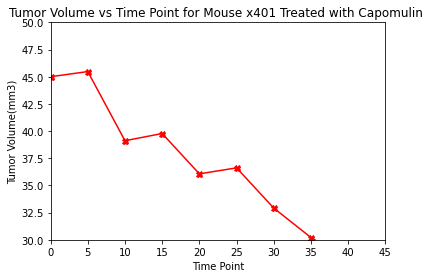

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x401_data = Test_mouse.loc[Test_mouse["Mouse ID"]=="x401",
                              ["Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]

x_value = x401_data["Timepoint"]
y_value = x401_data["Tumor Volume (mm3)"]
plt.plot(x_value,y_value,color = "r", marker = "X")


plt.xlim(min(x_value),max(x_value))
plt.ylim(30,50)
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Volume vs Time Point for Mouse x401 Treated with Capomulin ")

plt.show()

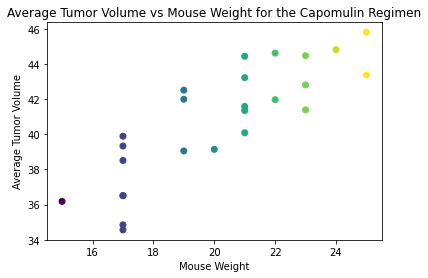

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_regimen_groupedby_mouseID = Test_mouse.loc[Test_mouse["Drug Regimen"]=="Capomulin",
                                      ["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]\
                                      .groupby("Mouse ID").mean()

average_tumor_volume = capomulin_regimen_groupedby_mouseID["Tumor Volume (mm3)"]
mouse_weight = capomulin_regimen_groupedby_mouseID["Weight (g)"]

plt.scatter(mouse_weight, average_tumor_volume, c = mouse_weight)
plt.ylabel("Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.title("Average Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.show()

## Correlation and Regression

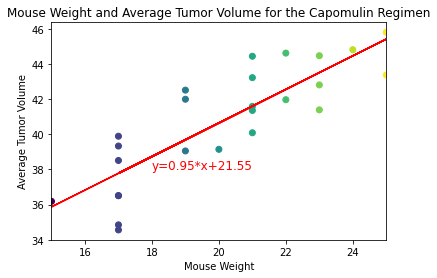

In [22]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue,pvalue,stdrr) = st.linregress( mouse_weight,average_tumor_volume)


plt.scatter( mouse_weight,average_tumor_volume, c = mouse_weight)
plt.ylabel("Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.title("Mouse Weight and Average Tumor Volume for the Capomulin Regimen")
plt.xlim(min(mouse_weight),max(mouse_weight))


equation = slope*mouse_weight+intercept
plt.plot(mouse_weight, equation, color ="r")

equation = "y="+str(round(slope,2))+"*x+"+str(round(intercept,2))
plt.annotate(equation, xy=(18, 38), fontsize=12, color ="r")



plt.show()